In [2]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

# (1) 데이터 가져오기
# sklearn.datasets의 load_diabetes 함수를 사용하여 당뇨병 데이터셋을 불러옵니다.
diabetes = load_diabetes()

# 특성 데이터를 df_X에 저장
df_X = diabetes.data

# 타겟 데이터를 df_y에 저장
df_y = diabetes.target

print(f"특성(X) 데이터 shape: {df_X.shape}")
print(f"타겟(y) 데이터 shape: {df_y.shape}")

# 데이터 살펴보기
# 데이터의 특성 이름 확인
print(f"특성 이름: {diabetes.feature_names}")

특성(X) 데이터 shape: (442, 10)
타겟(y) 데이터 shape: (442,)
특성 이름: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
# 데이터프레임으로 변환하여 살펴보기
df = pd.DataFrame(df_X, columns=diabetes.feature_names)
df['target'] = df_y
df.head(3)

# (2) 모델에 입력할 데이터 X 준비하기
# df_X를 numpy array로 변환
X = np.array(df_X)

# (3) 모델에 예측할 데이터 y 준비하기
# df_y를 numpy array로 변환
y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기
# 데이터를 train과 test로 분리 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (353, 10), X_test shape: (89, 10)
y_train shape: (353,), y_test shape: (89,)


In [4]:
# (5) 모델 준비하기
# 모델 파라미터 초기화
# 입력 데이터 X의 특성 개수에 맞는 가중치 W 초기화 (10개 특성이므로 10차원 벡터)
W = np.zeros(X_train.shape[1])
# 편향 b 초기화
b = 0

# 선형 회귀 모델 함수 정의
def model(X, W, b):
    """
    선형 회귀 모델 함수: y = X * W + b
    
    Parameters:
    X (np.array): 입력 데이터
    W (np.array): 가중치
    b (float): 편향
    
    Returns:
    np.array: 예측값
    """
    return np.dot(X, W) + b

# (6) 손실함수 loss 정의하기
# MSE(Mean Squared Error) 손실 함수 정의
def loss(X, y, W, b):
    """
    MSE 손실 함수: (1/n) * Σ(y_pred - y_true)²
    
    Parameters:
    X (np.array): 입력 데이터
    y (np.array): 실제 타겟 값
    W (np.array): 가중치
    b (float): 편향
    
    Returns:
    float: 평균 제곱 오차
    """
    n = len(y)  # 데이터 개수
    y_pred = model(X, W, b)  # 예측값
    mse = np.sum((y_pred - y) ** 2) / n  # 평균 제곱 오차 계산
    return mse


In [23]:
# (7) 기울기를 구하는 gradient 함수 구현하기
# 기울기(Gradient) 계산 함수 구현
def gradient(X, y, W, b):
    """
    MSE 손실 함수에 대한 가중치(W)와 편향(b)의 기울기 계산
    
    Parameters:
    X (np.array): 입력 데이터
    y (np.array): 실제 타겟 값
    W (np.array): 가중치
    b (float): 편향
    
    Returns:
    tuple: (dW, db) - 가중치와 편향에 대한 기울기
    """
    n = len(y)  # 데이터 개수
    y_pred = model(X, W, b)  # 예측값
    
    # W에 대한 기울기 계산: (2/n) * X^T * (y_pred - y)
    dW = (2 / n) * np.dot(X.T, (y_pred - y))
    
    # b에 대한 기울기 계산: (2/n) * sum(y_pred - y)
    db = (2 / n) * np.sum(y_pred - y)
    
    return dW, db

# (8) 하이퍼 파라미터인 학습률 설정하기
# 학습률(Learning Rate) 설정
learning_rate = 0.05

# 학습 에포크(반복 횟수) 설정
epochs = 10000

In [24]:

# (9) 모델 학습하기
# 손실값 저장을 위한 리스트
loss_history = []

# 모델 학습 (경사 하강법)
for epoch in range(epochs):
    # 기울기 계산
    dW, db = gradient(X_train, y_train, W, b)
    
    # 가중치와 편향 업데이트
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    # 현재 손실 계산
    current_loss = loss(X_train, y_train, W, b)
    loss_history.append(current_loss)
    
    # 학습 과정 출력 (100 에포크마다)
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}, Loss: {current_loss:.1f}")

print(f"\n학습된 가중치(W): {W}")
print(f"학습된 편향(b): {b}")


Epoch 0, Loss: 3840.1
Epoch 100, Loss: 3770.2
Epoch 200, Loss: 3707.9
Epoch 300, Loss: 3652.0
Epoch 400, Loss: 3601.7
Epoch 500, Loss: 3556.3
Epoch 600, Loss: 3515.1
Epoch 700, Loss: 3477.6
Epoch 800, Loss: 3443.3
Epoch 900, Loss: 3411.8
Epoch 1000, Loss: 3382.9
Epoch 1100, Loss: 3356.1
Epoch 1200, Loss: 3331.4
Epoch 1300, Loss: 3308.4
Epoch 1400, Loss: 3287.0
Epoch 1500, Loss: 3267.1
Epoch 1600, Loss: 3248.4
Epoch 1700, Loss: 3231.0
Epoch 1800, Loss: 3214.6
Epoch 1900, Loss: 3199.2
Epoch 2000, Loss: 3184.7
Epoch 2100, Loss: 3171.0
Epoch 2200, Loss: 3158.1
Epoch 2300, Loss: 3145.9
Epoch 2400, Loss: 3134.4
Epoch 2500, Loss: 3123.4
Epoch 2600, Loss: 3113.1
Epoch 2700, Loss: 3103.3
Epoch 2800, Loss: 3094.0
Epoch 2900, Loss: 3085.1
Epoch 3000, Loss: 3076.8
Epoch 3100, Loss: 3068.8
Epoch 3200, Loss: 3061.2
Epoch 3300, Loss: 3054.0
Epoch 3400, Loss: 3047.1
Epoch 3500, Loss: 3040.6
Epoch 3600, Loss: 3034.4
Epoch 3700, Loss: 3028.5
Epoch 3800, Loss: 3022.8
Epoch 3900, Loss: 3017.4
Epoch 4000, 

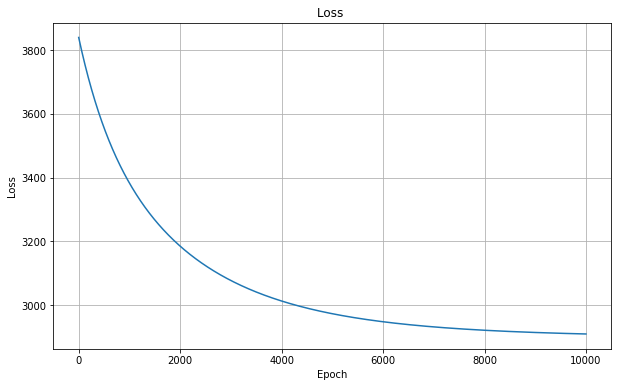

In [25]:
# 손실 함수 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [26]:
# (10) test 데이터에 대한 성능 확인하기
# 테스트 데이터에 대한 예측
y_pred_test = model(X_test, W, b)

# 테스트 데이터에 대한 MSE 계산
test_mse = loss(X_test, y_test, W, b)
print(f"테스트 데이터 MSE: {test_mse:.2f}")

테스트 데이터 MSE: 2869.09


In [27]:
# R-squared(결정 계수) 계산 함수
def r_squared(y_true, y_pred):
    """
    R-squared(결정 계수) 계산
    
    Parameters:
    y_true (np.array): 실제 타겟 값
    y_pred (np.array): 예측 값
    
    Returns:
    float: R-squared 값
    """
    # 총 제곱합(SST) 계산
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    
    # 잔차 제곱합(SSR) 계산
    ssr = np.sum((y_true - y_pred) ** 2)
    
    # R-squared 계산
    r2 = 1 - (ssr / sst)
    
    return r2

# 테스트 데이터에 대한 R-squared 계산
test_r2 = r_squared(y_test, y_pred_test)
print(f"테스트 데이터 R-squared: {test_r2:.4f}")

테스트 데이터 R-squared: 0.4585


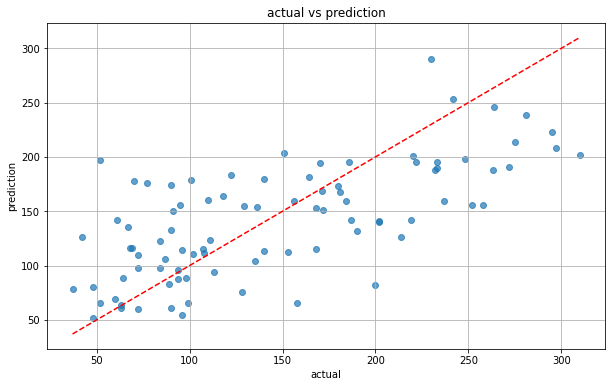

In [32]:
# 실제 값과 예측 값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('actual vs prediction')
plt.grid(True)
plt.show()

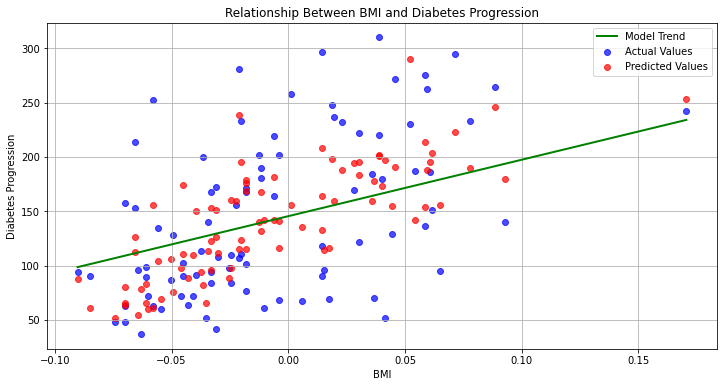

In [29]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
# X 데이터의 첫 번째 특성(bmi)을 기준으로 시각화
plt.figure(figsize=(12, 6))

# Actual values (scatter plot)
plt.scatter(X_test[:, 2], y_test, color='blue', alpha=0.7, label='Actual Values')

# Predicted values (scatter plot)
plt.scatter(X_test[:, 2], y_pred_test, color='red', alpha=0.7, label='Predicted Values')

# 모델의 선형 관계를 나타내기 위한 추세선
# BMI(X[:, 2])에 대해서만 선형 관계를 시각화

# BMI 범위 설정
bmi_range = np.linspace(min(X_test[:, 2]), max(X_test[:, 2]), 100)

# 다른 특성들의 평균값으로 가정하여 예측
X_trend = np.zeros((100, X_test.shape[1]))
for i in range(X_test.shape[1]):
    if i == 2:  # BMI 특성
        X_trend[:, i] = bmi_range
    else:
        X_trend[:, i] = np.mean(X_test[:, i])

# 추세선 예측
y_trend = model(X_trend, W, b)

# 추세선 그리기
plt.plot(bmi_range, y_trend, 'g-', linewidth=2, label='Model Trend')

plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Relationship Between BMI and Diabetes Progression')
plt.legend()
plt.grid(True)
plt.show()


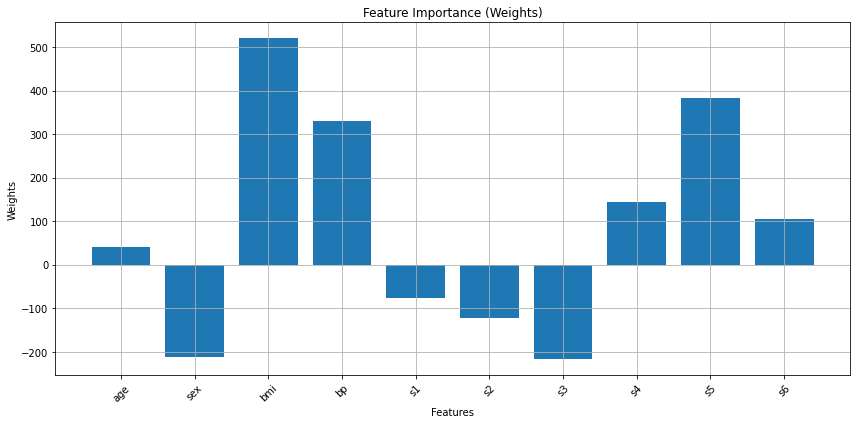

In [30]:
# 전체 변수의 중요도(가중치) 시각화
plt.figure(figsize=(12, 6))
plt.bar(diabetes.feature_names, W)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Importance (Weights)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# 결론
print("결론:")
print("1. 구현한 선형 회귀 모델이 당뇨병 데이터에 성공적으로 적용되었습니다.")
print(f"2. 테스트 데이터에 대한 MSE는 {test_mse:.2f}이고, R-squared는 {test_r2:.4f}입니다.")
print("3. 가중치 분석 결과, 당뇨병 진행 정도에 가장 중요한 영향을 미치는 특성은 다음과 같습니다:")

# 가중치 절대값 기준으로 상위 3개 특성 출력
top_features_idx = np.argsort(np.abs(W))[-3:][::-1]
for idx in top_features_idx:
    print(f"   - {diabetes.feature_names[idx]}: {W[idx]:.4f}")

결론:
1. 구현한 선형 회귀 모델이 당뇨병 데이터에 성공적으로 적용되었습니다.
2. 테스트 데이터에 대한 MSE는 2869.09이고, R-squared는 0.4585입니다.
3. 가중치 분석 결과, 당뇨병 진행 정도에 가장 중요한 영향을 미치는 특성은 다음과 같습니다:
   - bmi: 519.6788
   - s5: 383.6408
   - bp: 329.2757
